# Machine Learning Project to Predict the Sales Price of Bulldozers
This notebook project uses Python based machine learning and data science libraries in hopes to build a model capable of predicting the sales price of a particular bulldozer at an auction based on it's usage, equipment type, configuration, sales date, and various other traits.

This project has the following steps:
1. Problem Definition
2. Data Description
3. Evaulation of Project
4. Features Data and Engineering
5. Visualizing Data
6. Modeling
7. Conclusion

# 1. Problem  Definition
Given the sales of bulldozers over the years, predict the future sales price of a particular bulldozer at an auction based on it's characteristics and the data of previous sales.

# 2. Data Description
Since this is a time based project there are seperate CSV for train, valid, and test sets.
THe data was found on Kaggle from a past machine learning competition. The link to it is below:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/description

The key fields in the train set are:
* SalesID: the uniue identifier of the sale
- MachineID: the unique identifier of a machine. A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)

All of the atrributes/features are listed below:
- Variable Description
- SalesID unique identifier of a particular sale of a machine at auction
- MachineID identifier for a particular machine; machines may have multiple sales
- ModelID identifier for a unique machine model (i.e. fiModelDesc)
- datasource source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs.
- auctioneerID identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.
- YearMade year of manufacturer of the Machine
- MachineHoursCurrentMeter current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale
- UsageBand value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the
- fiBaseModel; e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
- Saledate time of sale
- Saleprice cost of sale in USD
- fiModelDesc Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc &
- fiModelSeries & fiModelDescriptor
- fiBaseModel disaggregation of fiModelDesc
- fiSecondaryDesc disaggregation of fiModelDesc
- fiModelSeries disaggregation of fiModelDesc
- fiModelDescriptor disaggregation of fiModelDesc
- ProductSize: ?
- ProductClassDesc description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
- State US State in which sale occurred
- ProductGroup identifier for top-level hierarchical grouping of fiModelDesc
- ProductGroupDesc description of top-level hierarchical grouping of fiModelDesc
- Drive_System machine configuration; typcially describes whether 2 or 4 wheel drive
- Enclosure machine configuration - does machine have an enclosed cab or not
- Forks machine configuration - attachment used for lifting
- Pad_Type machine configuration - type of treads a crawler machine uses
- Ride_Control machine configuration - optional feature on loaders to make the ride smoother
- Stick machine configuration - type of control
- Transmission machine configuration - describes type of transmission; typically automatic or manual
- Turbocharged machine configuration - engine naturally aspirated or turbocharged
- Blade_Extension machine configuration - extension of standard blade
- Blade_Width machine configuration - width of blade
- Enclosure_Type machine configuration - does machine have an enclosed cab or not
- Engine_Horsepower machine configuration - engine horsepower rating
- Hydraulics machine configuration - type of hydraulics
- Pushblock machine configuration - option
- Ripper machine configuration - implement attached to machine to till soil
- Scarifier machine configuration - implement attached to machine to condition soil
- Tip_control machine configuration - type of blade control
- Tire_Size machine configuration - size of primary tires
- Coupler machine configuration - type of implement interface
- Coupler_System machine configuration - type of implement interface
- Grouser_Tracks machine configuration - describes ground contact interface
- Hydraulics_Flow machine configuration - normal or high flow hydraulic system
- Track_Type machine configuration - type of treads a crawler machine uses
- Undercarriage_Pad_Width machine configuration - width of crawler treads
- Stick_Length machine configuration - length of machine digging implement
- Thumb machine configuration - attachment used for grabbing
- Pattern_Changer machine configuration - can adjust the operator control configuration to suit the user
- Grouser_Type machine configuration - type of treads a crawler machine uses
- Backhoe_Mounting machine configuration - optional interface used to add a backhoe attachment
- Blade_Type machine configuration - describes type of blade
- Travel_Controls machine configuration - describes operator control configuration
- Differential_Type machine configuration - differential type, typically locking or standard
- Steering_Controls machine configuration - describes operator control configuration

# 3. Evaluation of Project
What defines a successful project?
> Have a 95% accuracy at predicting the price of bulldozers in the valid dataset. Have a 85% accuracy rate at predicting the price of the bulldozers in the test dataset.
Below is the evaluation section for the Kaggle competition:
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. Sample submission files can be downloaded from the data page. Submission files should be formatted asfollows:
>- Have a header: "SalesID,SalePrice"
>- Contain two columns
>  - SalesID: SalesID for the validation set in sorted order
>  - SalePrice: Your predicted price of the sale

# 4. Features of the Data
What features (attributes) should be used in the model? To help, its best to ask professionals in the field. This data was not found via a competition on Kaggle, so this project is done by someone not in the bulldozer field. Section 2 shoulds all the featues. The target is the sales price.

Below are the steps taken to adjust the features of the data (aka feature engineering).
1. Import packages, libraries, and models.
2. Load Bulldozer data into notebook.
3. Transform Data 
4. Exploratory Data Analysis (EDA)

## 4.1 Import Packages
Imporant the packages that are needed within this notebook.

In [154]:
# Prepare the tools, aka import the packages
#Industry standard is to import all tools in one section
#Import Regular Exploratory Data Analysis (EDA) and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Allow plots to be inline within the notebook
%matplotlib inline

#Import machine learning Scikit-Learn Packages and Models
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#Import ML Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

#Import image viewing package on Jupyter Notebook
from IPython.display import Image

## 4.2 Load the Data

In [155]:
#Create Panda Dataframes for train, validate, and test datasets
# To create enich the date/time data of the salesdate use parse_dates
# Originally the pd.read had a low_memory warning because of differing datatypes in a column
# could add parameter: parse_dates=['saledate'],
train_df = pd.read_csv('data/Train.csv',
                       parse_dates=['saledate'],
                       low_memory=False)
valid_df = pd.read_csv('data/Valid.csv',
                       parse_dates=['saledate'],
                       low_memory=False)
test_df = pd.read_csv('data/Test.csv',
                      parse_dates=['saledate'],
                      low_memory=False)

In [156]:
# Add the salesprice data to both the valid and test dataframes
valid_solutions_df = pd.read_csv('data/ValidSolution.csv',
                             low_memory=False)
test_solutions_df = pd.read_csv('data/test_predictions.csv',
                            low_memory=False)

In [157]:
# Add sales ID and price to the valid and test dataframes
valid_df['SalesID'] = valid_solutions_df.SalesID
valid_df['SalePrice'] = valid_solutions_df.SalePrice

test_df['SalesID'] = test_solutions_df.SalesID
test_df['SalePrice'] = test_solutions_df.SalesPrice

# show that the amount of features between the dataframes are the same
print(f'Number of features for the Train, Valid, and Test sets: {len(train_df.columns),len(valid_df.columns),len(test_df.columns)}')

Number of features for the Train, Valid, and Test sets: (53, 53, 53)


##### Notes:
- There are 52 features in the train dataset and the target sales price.
- There are 401,125 instances of data (previous data of bulldozer sales)
- The information shows that all numbers not 401125 under 'Non-null Count' have null/missing values. The lower the value, the less amount of data available. 

# 5. Visualizing Data
Below are the steps taken to visualize the training data.
1. Description of Data
2. Info of Data.
3. Exploratory Data Analysis (EDA)

## 5.1 Description of Training Data

In [5]:
# See the train dataframe description (basic statistical values)
train_df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


## 5.2 Information of the Training Data

In [6]:
# See the train dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

##### See how many values are missing in all datasets

In [119]:
# Train Dataset/DataFrame Missing Values
len(train_df),train_df.isna().sum()

(401125,
 SalesID                          0
 SalePrice                        0
 MachineID                        0
 ModelID                          0
 datasource                       0
 auctioneerID                 20136
 YearMade                         0
 MachineHoursCurrentMeter    258360
 UsageBand                   331486
 saledate                         0
 fiModelDesc                      0
 fiBaseModel                      0
 fiSecondaryDesc             137191
 fiModelSeries               344217
 fiModelDescriptor           329206
 ProductSize                 210775
 fiProductClassDesc               0
 state                            0
 ProductGroup                     0
 ProductGroupDesc                 0
 Drive_System                296764
 Enclosure                      325
 Forks                       209048
 Pad_Type                    321991
 Ride_Control                252519
 Stick                       321991
 Transmission                217895
 Turbocharged      

In [120]:
# Valid Dataset/DataFrame Missing Values
len(valid_df),valid_df.isna().sum()

(11573,
 SalesID                         0
 MachineID                       0
 ModelID                         0
 datasource                      0
 auctioneerID                    0
 YearMade                        0
 MachineHoursCurrentMeter     6834
 UsageBand                    7542
 saledate                        0
 fiModelDesc                     0
 fiBaseModel                     0
 fiSecondaryDesc              3536
 fiModelSeries                9814
 fiModelDescriptor            8676
 ProductSize                  5830
 fiProductClassDesc              0
 state                           0
 ProductGroup                    0
 ProductGroupDesc                0
 Drive_System                 8847
 Enclosure                       9
 Forks                        5935
 Pad_Type                     9611
 Ride_Control                 7451
 Stick                        9611
 Transmission                 6796
 Turbocharged                 9611
 Blade_Extension             10809
 Blade_Width

In [121]:
# Test Dataset/DataFrame Missing Values
len(test_df),test_df.isna().sum()

(12457,
 SalesID                         0
 MachineID                       0
 ModelID                         0
 datasource                      0
 auctioneerID                    0
 YearMade                        0
 MachineHoursCurrentMeter    10328
 UsageBand                   10623
 saledate                        0
 fiModelDesc                     0
 fiBaseModel                     0
 fiSecondaryDesc              3975
 fiModelSeries               10451
 fiModelDescriptor            9433
 ProductSize                  6409
 fiProductClassDesc              0
 state                           0
 ProductGroup                    0
 ProductGroupDesc                0
 Drive_System                 9698
 Enclosure                       2
 Forks                        6149
 Pad_Type                    10349
 Ride_Control                 8216
 Stick                       10349
 Transmission                 7639
 Turbocharged                10349
 Blade_Extension             11806
 Blade_Width

In [8]:
# See the train dataframe 
# need to transform to see all the columns
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333290,6333302,6333307,6333311,6333335,6333336,6333337,6333338,6333341,6333342
SalePrice,66000,57000,10000,38500,11000,26500,21000,27000,21500,65000,...,10000,8500,10000,9500,8500,10500,11000,11500,9000,7750
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1843374,1825337,1821747,1828862,1798293,1840702,1830472,1887659,1903570,1926965
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21437,21437,21435,21439,21439,21439,21435,21435
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2005,2005,2005,2006,2005,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00,...,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


## 5.3 Exploratory Data Analysis (EDA)
The goal of this section is learn more about the data and become more familiar with the data. Below are the questions trying to be answered.
1. What questions are you trying to solve?
2. What kind of data do have and how do we treat different types?
3. What is missing from the data and how with them be dealt with?
4. Where are the outliers and why should they be cared about?
5. How can the features be added, changed, or removed so more is added to the data?

In [9]:
# What is the bulldozer target price range and description for the training data?
train_df.SalePrice.describe()

count    401125.000000
mean      31099.712848
std       23036.898502
min        4750.000000
25%       14500.000000
50%       24000.000000
75%       40000.000000
max      142000.000000
Name: SalePrice, dtype: float64

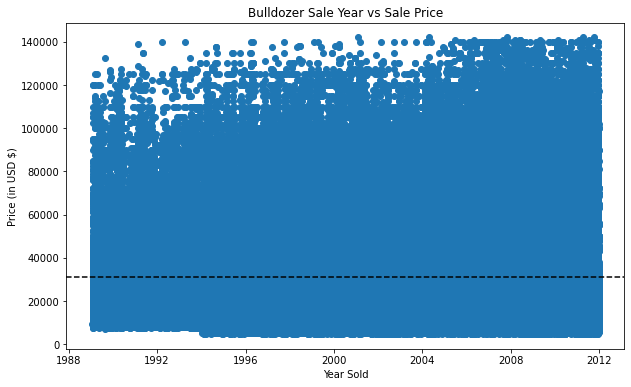

In [10]:
# Show the sales pricevs date on a scatter plot
fig,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=train_df.saledate,
                    y=train_df.SalePrice,
                    cmap='winter')

# Adjust the settings of the plot
ax.set(title = 'Bulldozer Sale Year vs Sale Price',
      xlabel = 'Year Sold',
      ylabel = 'Price (in USD $)');

# add mean line to show where the average is on the map
ax.axhline(train_df.SalePrice.mean(), 
           linestyle = '--',
          c='k');

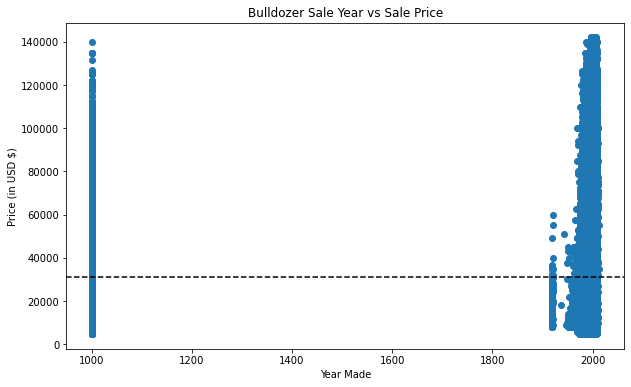

In [11]:
# Show the sales price vs year manufactured on a scatter plot
fig,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=train_df.YearMade,
                    y=train_df.SalePrice,
                    cmap='winter')

# Adjust the settings of the plot
ax.set(title = 'Bulldozer Sale Year vs Sale Price',
      xlabel = 'Year Made',
      ylabel = 'Price (in USD $)');

# add mean line to show where the average is on the map
ax.axhline(train_df.SalePrice.mean(), 
           linestyle = '--',
          c='k');

##### Note: More than a handful of data in the training set has Year Made as 1000. This isn't feasible. Maybe this was the default year?

- Create a plot with these values not visible

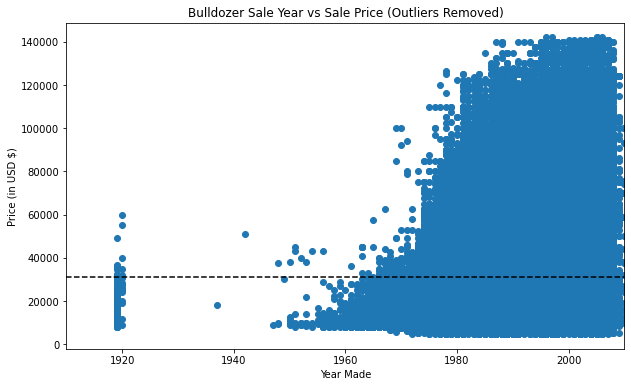

In [12]:
# Show the sales price vs year manufactured on a scatter plot
fig,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=train_df.YearMade,
                    y=train_df.SalePrice,
                    cmap='winter')

# Adjust the settings of the plot
ax.set(title = 'Bulldozer Sale Year vs Sale Price (Outliers Removed)',
      xlabel = 'Year Made',
      ylabel = 'Price (in USD $)',
      xlim = (1910,2010));

# add mean line to show where the average is on the map
ax.axhline(train_df.SalePrice.mean(), 
           linestyle = '--',
          c='k');

In [16]:
# Get Count of bulldozers 'made' before 1900. aka the year '1000'
len(train_df[train_df.YearMade < 1900])

38185

In [21]:
# Show the count and price range for each ProductGroupDesc
train_df.groupby('ProductGroupDesc').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ProductGroupDesc,,,,,,,,
Backhoe Loaders,79415.0,20897.352553,7601.831029,7500.0,15000.0,20500.0,26000.0,40000.0
Motor Graders,25489.0,47251.564518,32765.783030,8000.0,19000.0,40000.0,67000.0,142000.0
Skid Steer Loaders,43488.0,10549.458563,3551.567838,4750.0,7900.0,10000.0,13000.0,20000.0
Track Excavators,101167.0,35666.120622,23618.215130,7500.0,17000.0,29000.0,49000.0,110000.0
Track Type Tractors,80520.0,36158.412221,24338.874294,8000.0,18000.0,29000.0,46000.0,127500.0
Wheel Loader,71046.0,37052.463249,22596.334012,8000.0,18500.0,32000.0,51000.0,107000.0


In [23]:
# Show the price range for each state
train_df.groupby('state').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Alabama,9997.0,35369.592778,25118.819835,4750.0,17000.0,28000.0,46000.0,140000.0
Alaska,430.0,33281.976744,23899.245720,6000.0,15000.0,26000.0,45000.0,122500.0
Arizona,9173.0,31564.548130,24485.528038,4750.0,15000.0,23000.0,38000.0,140000.0
Arkansas,3869.0,28652.988886,21461.888200,4750.0,13900.0,22500.0,36000.0,141000.0
California,29019.0,29787.451256,22676.950954,4750.0,14000.0,22500.0,38000.0,140000.0
Colorado,11254.0,31740.737516,23312.413712,4750.0,14500.0,25000.0,42000.0,140000.0
Connecticut,8128.0,28841.707677,19722.238047,4750.0,14250.0,23500.0,37500.0,132000.0
Delaware,509.0,31185.952849,22901.846883,5000.0,14000.0,23000.0,41000.0,120000.0
Florida,63944.0,34064.361160,24382.776709,4750.0,15500.0,27000.0,45000.0,142000.0


In [38]:
# There was a lot of features that had NaN and 'None or Unspecified'
# Check the counts of values few shown on the truncated Dataframe above
print(f'Fork value counts: NaN: {train_df.Forks.isna().sum()}, \n {train_df.Forks.value_counts()}')
print('------')
print(f'Ride Control value counts: NaN: {train_df.Ride_Control.isna().sum()}, \n {train_df.Ride_Control.value_counts()}')
print('------')
print(f'Turbo charged value counts: NaN: {train_df.Turbocharged.isna().sum()}, \n {train_df.Turbocharged.value_counts()}')
print('------')
print(f'Coupler value counts: NaN: {train_df.Coupler.isna().sum()}, \n {train_df.Coupler.value_counts()}')
print('------')
print(f'Coupler System value counts: NaN: {train_df.Coupler_System.isna().sum()}, \n {train_df.Coupler_System.value_counts()}')
print('------')
print(f'Grouser Tracks value counts: NaN: {train_df.Grouser_Tracks.isna().sum()}, \n {train_df.Grouser_Tracks.value_counts()}')
print('------')
print(f'Undercarriage Pad Width value counts: NaN: {train_df.Undercarriage_Pad_Width.isna().sum()}, \n {train_df.Undercarriage_Pad_Width.value_counts()}')
print('------')
print(f'Stick Length value counts: NaN: {train_df.Stick_Length.isna().sum()}, \n {train_df.Stick_Length.value_counts()}')
print('------')
print(f'Thumb value counts: NaN: {train_df.Thumb.isna().sum()}, \n {train_df.Thumb.value_counts()}')
print('------')
print(f'Pattern Changer value counts: NaN: {train_df.Pattern_Changer.isna().sum()}, \n {train_df.Pattern_Changer.value_counts()}')

Fork value counts: NaN: 209048, 
 None or Unspecified    178300
Yes                     13777
Name: Forks, dtype: int64
------
Ride Control value counts: NaN: 252519, 
 No                     77685
None or Unspecified    63116
Yes                     7805
Name: Ride_Control, dtype: int64
------
Turbo charged value counts: NaN: 321991, 
 None or Unspecified    75211
Yes                     3923
Name: Turbocharged, dtype: int64
------
Coupler value counts: NaN: 187173, 
 None or Unspecified    184582
Manual                  23301
Hydraulic                6069
Name: Coupler, dtype: int64
------
Coupler System value counts: NaN: 357667, 
 None or Unspecified    40430
Yes                     3028
Name: Coupler_System, dtype: int64
------
Grouser Tracks value counts: NaN: 357763, 
 None or Unspecified    40515
Yes                     2847
Name: Grouser_Tracks, dtype: int64
------
Undercarriage Pad Width value counts: NaN: 301253, 
 None or Unspecified    79651
32 inch                 5213
28

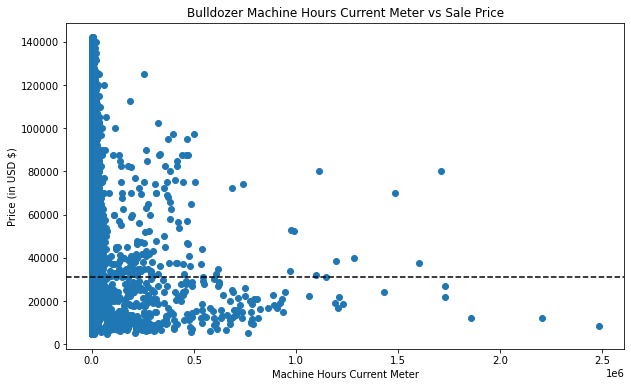

In [39]:
# Plot the MachineHoursCurrentMeter to see the spread and if there's any outliers or unrealistic values
fig,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=train_df.MachineHoursCurrentMeter,
                    y=train_df.SalePrice,
                    cmap='winter')

# Adjust the settings of the plot
ax.set(title = 'Bulldozer Machine Hours Current Meter vs Sale Price',
      xlabel = 'Machine Hours Current Meter',
      ylabel = 'Price (in USD $)');

# add mean line to show where the average is on the map
ax.axhline(train_df.SalePrice.mean(), 
           linestyle = '--',
          c='k');

In [72]:
# The most realistic oldest yearMade for a machine was 1920.
# The most years one would run is 92 years.
# The max hours it could ever be (not realistically) would be 92*24*365 = 805920 hours
# A more realistic number is 92*48*52 = 191,360 (years*hours per week *weeks in year)
# 1920-1940 people worked 8 hours 6 days a week
# How many samples are above that number?

# Checked the highest Machine Hours and it was a 2005 model. It's unrealistic.
# The lowest realistic year for MachineHours over 191k is 1979

 
train_df[train_df.MachineHoursCurrentMeter> 191360].MachineHoursCurrentMeter.describe(), train_df[train_df.MachineHoursCurrentMeter > 191360].YearMade.describe()

(count    2.990000e+02
 mean     4.858822e+05
 std      3.345028e+05
 min      1.916000e+05
 25%      2.674500e+05
 50%      3.750000e+05
 75%      5.995500e+05
 max      2.483300e+06
 Name: MachineHoursCurrentMeter, dtype: float64,
 count     299.000000
 mean     1799.307692
 std       401.193303
 min      1000.000000
 25%      1990.000000
 50%      1999.000000
 75%      2004.000000
 max      2007.000000
 Name: YearMade, dtype: float64)

In [98]:
temp_df = pd.DataFrame()
temp_df['saleYear'] = train_df.saledate.dt.year
temp_df['YearMade'] = train_df.YearMade
temp_df['SalePrice'] = train_df.SalePrice
# Change YearMade == 1000 to a realistic number
temp_df['MachineHoursCurrentMeter'] = train_df.MachineHoursCurrentMeter
temp_df['MaxMachineHours'] = (train_df.saledate.dt.year - train_df.YearMade) * 2088
temp_df.sort_values(by=['YearMade'],inplace=True,ascending=True)
temp_df[temp_df.YearMade <1930]

,saleYear,YearMade,SalePrice,MachineHoursCurrentMeter,MaxMachineHours
348124,2007,1000,13500,0.0,2102616
37243,1999,1000,10500,NaN,2085912
248661,2006,1000,34500,NaN,2100528
248655,2007,1000,16000,NaN,2102616
248622,2007,1000,37000,NaN,2102616
...,...,...,...,...,...
246287,2010,1920,60000,NaN,187920
239223,2007,1920,25000,NaN,181656
237930,2006,1920,35000,NaN,179568
252878,2005,1920,28500,NaN,177480


In [122]:
# See the amount of valid YearMade are below 1930 and higher than 191360
print(f'Total number of samples in Valid DF: {valid_df.SalePrice.count()}')
print(f'Valid DF YearMade Machines == 1000 (#,%): {valid_df[valid_df.YearMade == 1000].YearMade.count(), valid_df[valid_df.YearMade == 1000].YearMade.count()/valid_df.SalePrice.count()*100}%')
print(f'Valid DF YearMade Machines < 1930 (#,%): {valid_df[valid_df.YearMade < 1930].YearMade.count(),valid_df[valid_df.YearMade < 1930].YearMade.count()/valid_df.SalePrice.count()*100}%')
print(f'Valid DF MachineHours > 191360 (#,%): {valid_df[valid_df.MachineHoursCurrentMeter < 191360].MachineHoursCurrentMeter.count(),valid_df[valid_df.MachineHoursCurrentMeter < 191360].MachineHoursCurrentMeter.count()/valid_df.SalePrice.count()*100}%')

Total number of samples in Valid DF: 11573
Valid DF YearMade Machines == 1000 (#,%): (1206, 10.420807050894323)%
Valid DF YearMade Machines < 1930 (#,%): (1206, 10.420807050894323)%
Valid DF MachineHours > 191360 (#,%): (4739, 40.94876004493217)%


In [123]:
# See the amount of test YearMade are below 1930 and higher than 191360
print(f'Total number of samples in Test DF: {test_df.SalePrice.count()}')
print(f'Test DF YearMade Machines == 1000 (#,%): {test_df[test_df.YearMade == 1000].YearMade.count(), test_df[test_df.YearMade == 1000].YearMade.count()/test_df.SalePrice.count()*100}%')
print(f'Test DF YearMade Machines < 1930 (#,%): {test_df[test_df.YearMade < 1930].YearMade.count(),test_df[test_df.YearMade < 1930].YearMade.count()/test_df.SalePrice.count()*100}%')
print(f'Test DF MachineHours > 191360 (#,%): {test_df[test_df.MachineHoursCurrentMeter < 191360].MachineHoursCurrentMeter.count(),test_df[test_df.MachineHoursCurrentMeter < 191360].MachineHoursCurrentMeter.count()/test_df.SalePrice.count()*100}%')

Total number of samples in Test DF: 12457
Test DF YearMade Machines == 1000 (#,%): (1637, 13.141205747772336)%
Test DF YearMade Machines < 1930 (#,%): (1638, 13.14923336276792)%
Test DF MachineHours > 191360 (#,%): (2128, 17.08276471060448)%


In [133]:
# Find data on the age of machines omitting yearMade outliers
# Check to see the average age of the machines when sold
temp_df = train_df.copy()
#drop all rows with yearMade <1930
temp_df = temp_df.drop(temp_df[temp_df.YearMade < 1930].index)
# Make new column for the Age of the machine when sold
temp_df['AgeWhenSold'] = temp_df.saledate.dt.year - temp_df.YearMade
# Drop all rows where the age is negative
temp_df = temp_df.drop(temp_df[temp_df.AgeWhenSold < 0].index)

temp_df['AgeWhenSold'].describe(),temp_df['YearMade'].describe()

(count    362783.000000
 mean         10.192925
 std           7.437358
 min           0.000000
 25%           5.000000
 50%           8.000000
 75%          13.000000
 max          62.000000
 Name: AgeWhenSold, dtype: float64,
 count    362783.000000
 mean       1993.786627
 std           9.571161
 min        1937.000000
 25%        1988.000000
 50%        1996.000000
 75%        2001.000000
 max        2011.000000
 Name: YearMade, dtype: float64)

##### Notes:
- The yearMade feature being 1000 for 38185 samples is odd. It's most likely the default when the year isn't known. Alternatively they can be changed to NaN and adjusted in the next section.
- There is a lot of data labeled as 'None or Unspecified' which means it either doesn't have that feature or it's missing. 
    - Features that don't make sense to have 'None or Unspecified': Ride Control and Pattern Changer. Though the later has more 'None or Unspecified' than 'No'. All others make sense since they 'No' is not a value for that feature.
    - In attempt to not lose any information. All 'None or Unspecified' values will not be changed to NaN
- The 27 of the 53 features have over 3/4 of the samples missing the data (NaN). Since that is still over 100,000 samples will values, these features will stay.
- MachineHoursCurrentMeter has numbers that are not feasilbly large. They should adjusted.

##### What are the EDA goals answered?
1. What questions are you trying to solve?
- See below.
2. What kind of data do have and how do we treat different types?
- The sales date should be changed to the Pandas' datetime datatype.
- All features with string in them should be changed to Pandas' datatype Catergory. This will turn them into numbers.
3. What is missing from the data and how with them be dealt with?
- Category missing data can be set and adjusted to '0'
- Numerical missing data can be set to the median. This is used instead of the mean because far outliers would cause these to not be close to the middle of the group.
- All original features will have a corresponding '_is_missing' feature that is boolean. This will help the machine learning algorithm know that these samples with originally missing data are different from their values.
4. Where are the outliers and why should they be cared about?
- The yearMade being 1000 is an outlier and most likely the default when unknown. These values should be turned to NaN and then the median of the yearMade in the next section.
- MachineHoursCurrentMeter has outliers that are unrealistically large. ??????
5. How can the features be added, changed, or removed so more is added to the data?
- Features will be added for the sale date. Since sales of vehicles are heavily dependent on the time of day, month, or year these are potentially important features. The original saledate will be deleted.
- All features will have a corresponding '_is_missing' feature that is boolean. This will help the machine learning algorithm know that these samples with originally missing data are different from their values.

## 4.3 Transform Data
The original train data has quite a few missing values as well as not indepth dates. In the vehicle sales field, the sell date is heavily based upon the time of the month/year (at least in automative). In this section the goal is to create Dataframes from the unedited versions, transform columns with missing data, transform columns to useful datatypes, and to delete/add/adjust columns\features. This first round of machine modeling will start with all the features, filling in the missing data and adding columns with True/False when they were originally missing. 
1. Create Used and Original DataFrames
2. Transform/adjust columns to useful datatypes
3. Transform/Adjust columns with missing data
4. Delete/add/adjust columns/features. 

### 4.3.1 Create Used and Original DataFrames
Create copies of the train, valid(ate), and test dataFrames before editing.

In [158]:
train_original_df = train_df.copy()
valid_original_df = valid_df.copy()
test_original_df = test_df.copy()

### 4.3.2 Change all columns with String type into Category 
Category is a panda's type. For this, Pandas creates a number for each same string in the column. FOr exampl, in the 'state' column Arizona can get the number '3'. Changing the datatype to category can help with the machine learning algorithm.

In [159]:
# Change all columns with strings in them to dtype

# Function that takes a DataFrame to convert all columns with strings
# and changes that datatype of category for the ML model to shift through
def string_column_to_category(df):
    # DataFrame.items():Iterate over (column name, Series) pairs.
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
    return df

In [160]:
# update dataframes with category datatypes of string columns
train_df = string_column_to_category(train_df)
valid_df = string_column_to_category(valid_df)
test_df = string_column_to_category(test_df)

#check the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   category      
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  category      
 11  fiBaseModel               401125 non-null  category      
 12  fi

In [133]:
#Check the codes for the new categorical type for train df's State column
pd.Categorical(train_df['state']).codes

array([ 0, 32, 31, ..., 19,  8,  8], dtype=int8)

### 4.3.3 Transform/Adjust columns with missing data
### 4.3.3a  Sale Date Transformation
The columns that should be added for indepth dates are: 
- saleYear
- saleMonth
- saleDay
- saleDay
- saleDayOfWeek

The original saleDate feature will be deleted.

In [162]:
# Create Function to add sales date Year, Month, Day, DayOfWeek to DFs
# This function also creates the rows in order for date.
# This function returns the updated dataframe
def add_date_features(df):
    df.sort_values(by=['saledate'],inplace=True,ascending=True)

    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    df.drop('saledate',axis=1, inplace=True)
    return df

In [163]:
# Add sales date features to train, valid, and test DFs
train_df = add_date_features(train_df)
valid_df = add_date_features(valid_df)
test_df = add_date_features(test_df)

#Check train DF's new columns
train_df.T.tail(8)

,205615,92803,98346,169297,274835,75378,81383,134080,55455,55454,...,394193,393175,393211,397995,400034,393123,397987,392664,400458,400217
Travel_Controls,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,...,None or Unspecified,NaN,None or Unspecified,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN
Differential_Type,NaN,NaN,NaN,Standard,Standard,Standard,Standard,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,Standard,NaN
Steering_Controls,NaN,NaN,NaN,Conventional,Conventional,Conventional,Conventional,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Conventional,NaN,Conventional,NaN
saleYear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
saleMonth,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
saleDay,17,31,31,31,31,31,31,31,31,31,...,30,30,30,30,30,30,30,30,30,30
saleDayOfWeek,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleDayOfYear,17,31,31,31,31,31,31,31,31,31,...,364,364,364,364,364,364,364,364,364,364


### 4.3.3b Transform Unrealistic YearMade and Machine Hours into NaN
- make functions to change the YearMade to not be <1930. and the MachineHours to realistic values
- can't make YearMade == median because its higher than the lowest saledate<1930

- Number of Machines that were younger than their sold date: 13.
- Lowest saleDate of YearMade<1930 = 1989
- average age machine age when sold (omitting outliers) is 8

In [164]:
# Change yearMade to below 1930 to NaN
# The first bulldozer was made in 1924 and all sales were in the 1980s that were seen
def yearMade_NaN_create(df):
    df.loc[df['YearMade'] <1930,'YearMade'] = np.nan
    #make YearMade NaN if it is newer than its sale year (not possible)
    df.loc[(df['YearMade'] > df['saleYear']),'YearMade'] = np.nan
    return df

# Change MachineHours above a reasonable amount to missing.
# A reasonable amount is 16hour/day, 365days/year
# function changes unrealistic MachineHours to NaN.
# It creates a column for maximum MachineHours possible and deletes it before turn
# Maximum machine hours is used to determine if the MachineHoursCurrentMeter value is feasible.
def MachineHours_NaN_create(df):
    df['MaxMachineHours'] = (df.saleYear - df.YearMade) *16*365
    df['MachineHoursFeasible'] = df['MaxMachineHours'] > df['MachineHoursCurrentMeter']
    df.loc[df['MachineHoursFeasible'] == False, 'MachineHoursCurrentMeter'] = np.nan
    # Drop the newly created columns
    df.drop(['MaxMachineHours','MachineHoursFeasible'], axis=1, inplace=True)
    return df



train_df = yearMade_NaN_create(train_df)
train_df = MachineHours_NaN_create(train_df)
train_df['YearMade'].describe(), train_df.MachineHoursCurrentMeter.describe()

(count    362783.000000
 mean       1993.786627
 std           9.571161
 min        1937.000000
 25%        1988.000000
 50%        1996.000000
 75%        2001.000000
 max        2011.000000
 Name: YearMade, dtype: float64,
 count    125783.000000
 mean       2261.859560
 std        3999.625143
 min           0.000000
 25%           0.000000
 50%         167.000000
 75%        3046.000000
 max      161800.000000
 Name: MachineHoursCurrentMeter, dtype: float64)

##### Notes:
- Made 16982 out of the filled 142765 samples' MachineHoursCurrentMeter = NaN
- Made 38342 out of the filled 401125 samples' YearMade = NaN

### 4.3.4a Fill in the Missing Numerical Values with the Median
Median is picked because it is less harmful than values being set to the mean. The median reflects the middle of the values. This helps with outliers.

In [165]:
# Filling in numerical missing values with median of column
# and creating a column with bool on whether it was initially missing

#function that takes dataframe and fills in columns with missing numeric data
#returns updated dataframe
def numerical_column_fill_in(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            #create column that shows which of the original data was missing
            df[label+'_is_missing'] = pd.isnull(content)
            #fill missing numeric values with median (safer than mean)
            df[label] = content.fillna(content.median())
    return df


#function that takes a dataframe and fills in missing yearMade column with the average from the saledate
# and created new yearMade_is_missing column
# returns updated dataframae
# the average age of machine when sold is 8.
def yearMade_fill_in(df):
    df['YearMade' + '_is_missing'] = pd.isnull(df.YearMade)
    df.loc[df['YearMade'].isna(),'YearMade'] = df.saleYear - 8
    df.YearMade = df.YearMade.astype(int)
    return df

In [166]:
# Fill in missing yearMade values 
train_df = yearMade_fill_in(train_df)
valid_df = yearMade_fill_in(valid_df)
test_df = yearMade_fill_in(test_df)

# fill in missing numerical values with medians
train_df = numerical_column_fill_in(train_df)
valid_df = numerical_column_fill_in(valid_df)
test_df = numerical_column_fill_in(test_df)

#check the train_df for now missing data in columns
train_df.YearMade.isna().sum(),train_df.isna().sum()[:10]

(0,
 SalesID                          0
 SalePrice                        0
 MachineID                        0
 ModelID                          0
 datasource                       0
 auctioneerID                     0
 YearMade                         0
 MachineHoursCurrentMeter         0
 UsageBand                   331486
 fiModelDesc                      0
 dtype: int64)

### 4.3.4b Fill in the Missing Non-Numerical Values with Categorical Codes
If the value is missing in a panda's category datatype it turns to -1. To adjust this all values are +1. This will make the lowest categorical values equal to zero (0).

In [167]:
# Filling in non-numerical missing values 0
# and creating a column with bool on whether it was initially missing
#function that takes dataframe and fills in columns with missing data to 0
#changes all values to pandas' created category code
#returns updated dataframe
def non_numerical_column_fill_in(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #create column that shows which of the original data was missing
            df[label+'_is_missing'] = pd.isnull(content)
            #fill missing numeric values with median (safer than mean)
            df[label] = pd.Categorical(content).codes + 1
    return df

In [168]:
# update non-numerical columns in dataframes with category codes +1
train_df = non_numerical_column_fill_in(train_df)
valid_df = non_numerical_column_fill_in(valid_df)
test_df = non_numerical_column_fill_in(test_df)

#check the train_df state for update
train_df['state'][:10]

C:\Users\dnkoz\AppData\Local\Temp/ipykernel_8608/4160626586.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing'] = pd.isnull(content)
C:\Users\dnkoz\AppData\Local\Temp/ipykernel_8608/4160626586.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing'] = pd.isnull(content)
C:\Users\dnkoz\AppData\Local\Temp/ipykernel_8608/4160626586.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

205615    44
92803      9
98346      9
169297     9
274835     9
75378      9
81383      9
134080     9
55455      9
55454      9
Name: state, dtype: int8

In [169]:
# check if there is no missing data
train_df.isna().sum()[:55]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

### 4.3.4c Add Missing Columns from Datasets so Train, Valid, and Test have the Same

In [170]:
# Check the column names of the dataframes for feature count the same

len(train_df.columns), len(valid_df.columns), len(test_df.columns)

(115, 115, 115)

##### Note:
The original amount of columns were 53 (52 features, one target). This project added 5 for the differing date attributes, deleted the original saleDate feature, and created '_is_missing' columns for every feature. This column is boolean.

# 6. Modeling
Since this is large amounts of data (>100k samples), Sklearn's algorithm cheatsheet suggests to try the SDG Regressor algorithm model first.

After that I will try RandomForestClassifier since it has such success on other projects. If that doesn't work, I will lookup other regressors and try them.

Steps:
1. Split Data into train and test sets
2. Bulk Try Models
3. Tune the Best Model

## 6.1 Split Data

In [171]:
#Shuffle data before setting X,y.
# This is done for modeling quickly of the training data
train_df = train_df.sample(frac=1)

# Split data into X,y and train,valid,test sets
X_train = train_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_train = train_df.SalePrice

X_valid = valid_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_valid = valid_df.SalePrice

X_test = test_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_test = test_df.SalePrice

#Check shapes of each set
print(f'Train set X,y: {X_train.shape,y_train.shape}')
print('---')
print(f'Valid set X,y: {X_valid.shape,y_valid.shape}')
print('---')
print(f'Test set X,y: {X_test.shape,y_test.shape}')

Train set X,y: ((401125, 113), (401125,))
---
Valid set X,y: ((11573, 113), (11573,))
---
Test set X,y: ((12457, 113), (12457,))



## 6.2 Bulk Try Models

- LinearRegression
- Lasso
- ElasticNet
- DecisionTreeRegressor
- GradientBoostingRegressor
- SGDRegressor
- KNeighborsRegressor
- RandomForestRegressor

In [179]:
# Create function to calculate the Root Mean Squared Log Error
# This is the metric in which this competition evaulates on
# returns  Root Mean Squared Log Error betweeen the actual target values and the predicted ones.
# return np.nan if the y_preds is negative. Can't preform sqrt of it.
def rmsle(y_actual, y_preds):
    # if any prediction values are less than 0 the log can't be taken
    # make it NaN instead
    if (y_actual < 0).any() or (y_preds < 0).any():
        return np.nan
    else:
        return np.sqrt(mean_squared_log_error(y_actual, y_preds))


# Create function to store model evauluation metrics
# Returns the evaulation metrics of model in a dictionary
def model_metrics(model):
    #Create predictions on datasets
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    test_preds = model.predict(X_test)
    #Create dictionary of stored evaulation metrics
    model_metrics = {'Train Mean Absoluate Error': mean_absolute_error(y_train,train_preds),
                    'Train R^2': model.score(X_train,y_train),
                    'Train Root Mean Squared Log Error': rmsle(y_train,train_preds),
                    'Valid Mean Absoluate Error': mean_absolute_error(y_valid, valid_preds),
                    'Valid R^2': model.score(X_valid,y_valid),
                    'Valid Root Mean Squared Log Error': rmsle(y_valid, valid_preds),
                    'Test Mean Absoluate Error': mean_absolute_error(y_test,test_preds),
                    'Test R^2': model.score(X_test,y_test),
                    'Test Root Mean Squared Log Error': rmsle(y_test,test_preds)}
    return model_metrics
        

# Create Function that fits and scores the sklearn models in dict
# all models use default hyperparameters
# returns models and modelscores
def fit_and_score(model_dict, X_train,y_train,X_valid,y_valid):
    #Set random seed for modeling consistency
    np.random.seed(0)
    #Create empty dictionary for model scores
    model_scores = {}
    #Create empty dictionary for fit models
    models = {}
    # Loop through fit, scoring, and saving models
    for name, model in model_dict.items():
        #Fit models
        model.fit(X_train,y_train)
        #store models in dict
        models[name] = [model]
        #evaluate models
        model_scores[name] = model_metrics(model)
        
    return models, model_scores

In [60]:
# create dictionary of all models
model_dict = {'linear': LinearRegression(),
              'lasso': Lasso(),
              'elasticnet': ElasticNet(),
              'gradientboosting': GradientBoostingRegressor(),
              'decisiontree': DecisionTreeRegressor(),
              'sgd_reg': SGDRegressor(),
              'knn': KNeighborsRegressor(),
              'rand_for_reg': RandomForestRegressor()}
# Call fit and score function
models,model_scores = fit_and_score(model_dict, X_train[5000:],y_train[5000:],X_valid,y_valid)
model_scores

C:\Users\dnkoz\Desktop\my_data_projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.721e+13, tolerance: 2.102e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\dnkoz\Desktop\my_data_projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.561e+13, tolerance: 2.102e+10
  model = cd_fast.enet_coordinate_descent(


{'linear': {'Train Mean Absoluate Error': 10807.73189951023,
  'Train R^2': 0.5526152646638574,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 146811.12285184834,
  'Valid R^2': -254.32687499851517,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 180103.0739314411,
  'Test R^2': -903.807159559362,
  'Test Root Mean Squared Log Error': nan},
 'lasso': {'Train Mean Absoluate Error': 10817.908740345289,
  'Train R^2': 0.5519235393543818,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 147314.52769709853,
  'Valid R^2': -255.88614981567036,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 180839.00959384485,
  'Test R^2': -910.223989151865,
  'Test Root Mean Squared Log Error': nan},
 'elasticnet': {'Train Mean Absoluate Error': 12164.745944427887,
  'Train R^2': 0.44252193945110685,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 129366.78716437596,
  '

##### Save original bulk modeling metrics: 
{'linear': {'Train Mean Absoluate Error': 10807.73189951023,
  'Train R^2': 0.5526152646638574,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 146811.12285184834,
  'Valid R^2': -254.32687499851517,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 180103.0739314411,
  'Test R^2': -903.807159559362,
  'Test Root Mean Squared Log Error': nan},
 
 'lasso': {'Train Mean Absoluate Error': 10817.908740345289,
  'Train R^2': 0.5519235393543818,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 147314.52769709853,
  'Valid R^2': -255.88614981567036,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 180839.00959384485,
  'Test R^2': -910.223989151865,
  'Test Root Mean Squared Log Error': nan},
 
 'elasticnet': {'Train Mean Absoluate Error': 12164.745944427887,
  'Train R^2': 0.44252193945110685,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 129366.78716437596,
  'Valid R^2': -188.24714105409282,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 156831.24795754283,
  'Test R^2': -747.8200056031978,
  'Test Root Mean Squared Log Error': nan},
 
 'gradientboosting': {'Train Mean Absoluate Error': 7780.746006661501,
  'Train R^2': 0.7516162443464555,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 12381.390404522985,
  'Valid R^2': 0.5289374765750823,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 6230.915930172207,
  'Test R^2': 0.7369436110401879,
  'Test Root Mean Squared Log Error': nan},
 
 'decisiontree': {'Train Mean Absoluate Error': 72.33206855718292,
  'Train R^2': 0.9979066533207246,
  'Train Root Mean Squared Log Error': 0.03272800883936385,
  'Valid Mean Absoluate Error': 15582.880566836604,
  'Valid R^2': 0.11024555017054316,
  'Valid Root Mean Squared Log Error': 0.7372124228716875,
  'Test Mean Absoluate Error': 11920.399469274951,
  'Test R^2': -0.03632067871902711,
  'Test Root Mean Squared Log Error': 0.6498425121589132},
 
 'sgd_reg': {'Train Mean Absoluate Error': 4.527259631750331e+19,
  'Train R^2': -1.0527404024106067e+31,
  'Train Root Mean Squared Log Error': nan,
  'Valid Mean Absoluate Error': 2.352330006414128e+20,
  'Valid R^2': -1.0099025408562145e+32,
  'Valid Root Mean Squared Log Error': nan,
  'Test Mean Absoluate Error': 2.6797991216958806e+20,
  'Test R^2': -3.3627903921913066e+32,
  'Test Root Mean Squared Log Error': nan},
 
 'knn': {'Train Mean Absoluate Error': 9574.495230663755,
  'Train R^2': 0.611080562273042,
  'Train Root Mean Squared Log Error': 0.42244464026453166,
  'Valid Mean Absoluate Error': 15930.828065324462,
  'Valid R^2': 0.266988980332024,
  'Valid Root Mean Squared Log Error': 0.6263416749873872,
  'Test Mean Absoluate Error': 13986.127369889791,
  'Test R^2': -0.5355549889567632,
  'Test Root Mean Squared Log Error': 0.6194738877683383},
 
 'rand_for_reg': {'Train Mean Absoluate Error': 1641.957965746338,
  'Train R^2': 0.9860995111870936,
  'Train Root Mean Squared Log Error': 0.0895035207041407,
  'Valid Mean Absoluate Error': 11889.925900803593,
  'Valid R^2': 0.40850297657315515,
  'Valid Root Mean Squared Log Error': 0.5334289002568295,
  'Test Mean Absoluate Error': 7037.749756568628,
  'Test R^2': 0.6096397833936529,
  'Test Root Mean Squared Log Error': 0.4227270277870001}}

##### Bulk Modeling Notes:
- The following models create negative predictions: LinearRegression, Lasso, ElasticNet, GradientBoostingRegressor, and SGD.
- The following models had feasible evaluation metrics: DecisionTree, Kneighbors, and RandomForest.
- The order of the best model for predicting sales price, evaulated with the Root Mean Squared Log Error are:
    1. RandomForestRegressor
    2. KNeighborsRegressor
    3. DecisionTreeRegressor
- 'decisiontree': {'Train Mean Absoluate Error': 72.33206855718292,
     - 'Train R^2': 0.9979066533207246,
     - 'Train Root Mean Squared Log Error': 0.03272800883936385,
     - 'Valid Mean Absoluate Error': 15582.880566836604,
     - 'Valid R^2': 0.11024555017054316,
     - 'Valid Root Mean Squared Log Error': 0.7372124228716875,
     - 'Test Mean Absoluate Error': 11920.399469274951,
     - 'Test R^2': -0.03632067871902711,
     - 'Test Root Mean Squared Log Error': 0.6498425121589132},
- 'knn': {'Train Mean Absoluate Error': 9574.495230663755,
     - 'Train R^2': 0.611080562273042,
     - 'Train Root Mean Squared Log Error': 0.42244464026453166,
     - 'Valid Mean Absoluate Error': 15930.828065324462,
     - 'Valid R^2': 0.266988980332024,
     - 'Valid Root Mean Squared Log Error': 0.6263416749873872,
     - 'Test Mean Absoluate Error': 13986.127369889791,
     - 'Test R^2': -0.5355549889567632,
     - 'Test Root Mean Squared Log Error': 0.6194738877683383},
- 'rand_for_reg': {'Train Mean Absoluate Error': 1641.957965746338,
     - 'Train R^2': 0.9860995111870936,
     - 'Train Root Mean Squared Log Error': 0.0895035207041407,
     - 'Valid Mean Absoluate Error': 11889.925900803593,
     - 'Valid R^2': 0.40850297657315515,
     - 'Valid Root Mean Squared Log Error': 0.5334289002568295,
     - 'Test Mean Absoluate Error': 7037.749756568628,
     - 'Test R^2': 0.6096397833936529,
     - 'Test Root Mean Squared Log Error': 0.4227270277870001}}

## 6.3 Tune the Best Model

The best performing model from the bulk modeling section was RandomForestRegressor.


Steps for tuning:
1. Tune with Features Used
2. Tune with RandomizedSearchCV
3. Tune with GridSearchCV
4. Find Ideal Sample Size
5. Show Metrics of Performing Model

In [181]:
# Show default RandomForestRegressor Model
#Set random seed for modeling consistency
np.random.seed(0)

# create model
# n_jobs =-1 means that all processors are used for modeling.
reg = RandomForestRegressor(n_jobs= -1, max_samples=5000)

# fit model
reg.fit(X_train,y_train)

# score model
reg_metrics = model_metrics(reg)

#show model metrics
reg_metrics

{'Train Mean Absoluate Error': 6222.113945303833,
 'Train R^2': 0.8296178381574544,
 'Train Root Mean Squared Log Error': 0.29008791970388553,
 'Valid Mean Absoluate Error': 10650.717037933118,
 'Valid R^2': 0.5860208721921204,
 'Valid Root Mean Squared Log Error': 0.41659382271207096,
 'Test Mean Absoluate Error': 4849.449574030867,
 'Test R^2': 0.8451430673804705,
 'Test Root Mean Squared Log Error': 0.2990268476858745}

### 6.3.1 Tune With Features Used
Adjust the features used to is the model is more accurate

#### 6.3.1a Tune With Dropping the Least Used Features

##### See how accurate the model is will deleting features (features with 75% of samples missing the data: ~300k missing that feature)


 UsageBand                   331486
 fiModelSeries               344217
 fiModelDescriptor           329206
 Pad_Type                    321991
 Stick                       321991
 Turbocharged                321991
 Blade_Extension             375906
 Blade_Width                 375906
 Enclosure_Type              375906
 Engine_Horsepower           375906
 Pushblock                   375906
 Scarifier                   375895
 Tip_Control                 375906
 Tire_Size                   306407
 Coupler_System              357667
 Grouser_Tracks              357763
 Hydraulics_Flow             357763
 Track_Type                  301972
 Undercarriage_Pad_Width     301253
 Stick_Length                301907
 Thumb                       301837
 Pattern_Changer             301907
 Grouser_Type                301972
 Backhoe_Mounting            322453
 Blade_Type                  321292
 Travel_Controls             321291
 Differential_Type           331714
 Steering_Controls           331756
 
 
UsageBand,
fiModelSeries,
fiModelDescriptor,
Pad_Type,
Stick,
Turbocharged,
Blade_Extension,
Blade_Width,
Enclosure_Type,
Engine_Horsepower,
Pushblock,
Scarifier,
Tip_Control,
Tire_Size,
Coupler_System,
Grouser_Tracks,
Hydraulics_Flow,
Track_Type,
Undercarriage_Pad_Width,
Stick_Length,
Thumb,
Pattern_Changer,
Grouser_Type,
Backhoe_Mounting,
Blade_Type,
Travel_Controls,
Differential_Type,
Steering_Controls

In [187]:
# create function to delete features from dataframe
#returns updated datafrom 
def drop_mass_missing_features(df):
    # list of features that have more than 300k samples missing data for it.
    features = ['UsageBand', 'fiModelSeries', 'fiModelDescriptor', 'Pad_Type', 'Stick', 'Turbocharged', 'Blade_Extension',
                'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Scarifier', 'Tip_Control', 'Tire_Size',
                'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 
                'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 
                'Travel_Controls', 'Differential_Type', 'Steering_Controls']
    # drop the features and their corresponding 'is_missing' feature.
    for name in features:
        df.drop(name, axis=1, inplace=True)
        df.drop(name + '_is_missing', axis=1, inplace=True)
    return df

In [200]:
# Create temp train, valid, test datasets with the feature adjustment
#create a temporary dataframe copying the training dataset.
temp_train_df = train_df.copy()
temp_valid_df = valid_df.copy()
temp_test_df = test_df.copy()

#Drop the least used features
temp_train_df = drop_mass_missing_features(temp_train_df)
temp_valid_df = drop_mass_missing_features(temp_valid_df)
temp_test_df = drop_mass_missing_features(temp_test_df)

In [201]:
# Model

#Split data with the most used features
X_train_temp = temp_train_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_train_temp = temp_train_df.SalePrice

X_valid_temp = temp_valid_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_valid_temp = temp_valid_df.SalePrice

X_test_temp = temp_test_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_test_temp = temp_test_df.SalePrice

# max_samples = 5000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
temp= RandomForestRegressor(n_jobs= -1, 
                                  max_samples=5000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
temp.fit(X_train_temp,y_train_temp)

# score model
train_preds = temp.predict(X_train_temp)
valid_preds = temp.predict(X_valid_temp)
test_preds = temp.predict(X_test_temp)
temp_metrics ={'Train Root Mean Squared Log Error': rmsle(y_train_temp,train_preds),
                'Valid Root Mean Squared Log Error': rmsle(y_valid_temp, valid_preds),
                'Test Root Mean Squared Log Error': rmsle(y_test_temp,test_preds)}

#show model metrics
temp_metrics

{'Train Root Mean Squared Log Error': 0.29276791244236056,
 'Valid Root Mean Squared Log Error': 0.4644841657559852,
 'Test Root Mean Squared Log Error': 0.22944865147653162}

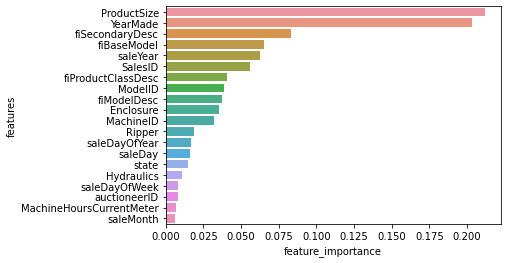

In [203]:
# Show the most important features for this model
# function to plot important features
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importance})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")
    
plot_features(X_train_temp.columns, temp.feature_importances_)

#### 6.3.1b Tune with Using Data with the Least NaN

In [204]:
#See if picking certain sample from the 400k+ train dataset is beneficial in prediciting sales price
# Will try the data with the most filled in features
#create a temporary dataframe copying the training dataset.
temp_df = train_df.copy()

#create new feature with the number of originally missing data
temp_df['numMissing'] = temp_df.select_dtypes(include=['bool']).sum(axis=1)

# update dataframe with only the most feature data
len(temp_df[temp_df.numMissing < 30])

227524

In [205]:
X_train_temp.T

,23238,28205,62382,150218,153316,79915,319108,284584,65058,136115,...,97503,345562,295173,71613,261523,293237,20677,395067,70256,113754
SalesID,1220133,1257839,1328578,1524363,1532877,1375435,2297717,1903049,1335111,1494604,...,1413662,2394305,2225443,1353296,1796699,2215566,1211079,6272298,1348319,1450033
MachineID,454026,1382933,1529857,1209581,1392306,20324,233640,1200961,1355035,1342876,...,118380,10088,1073172,620284,1345181,844654,154197,5361,1146313,1385855
ModelID,3786,6589,4104,1177,7052,1650,7026,21438,7624,3537,...,3538,16145,1092,3878,9555,4123,1580,1598,4146,4123
datasource,121,132,132,132,132,132,136,132,132,132,...,132,136,136,132,132,136,121,149,132,132
auctioneerID,3.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,20.0,1.0,...,1.0,2.0,2.0,1.0,4.0,1.0,3.0,1.0,1.0,4.0
YearMade,2006,1981,1978,1994,1995,1993,2001,2003,1985,1996,...,1998,2000,1994,1992,1993,1970,2004,2004,1964,1965
MachineHoursCurrentMeter,1453.0,167.0,167.0,167.0,167.0,167.0,0.0,167.0,167.0,167.0,...,167.0,167.0,0.0,167.0,167.0,13808.0,3788.0,167.0,167.0,167.0
fiModelDesc,1703,111,2148,557,471,2329,396,656,3097,736,...,738,1508,476,1766,1440,2274,2197,2211,2364,2274
fiBaseModel,518,33,690,186,173,711,136,207,1049,243,...,243,422,173,539,415,704,696,696,716,704
fiSecondaryDesc,57,0,48,0,0,59,0,106,0,21,...,29,168,0,55,0,29,57,101,59,29


In [206]:
#Model with the least amount of missing data
X_train_temp = temp_df.drop(['SalePrice','SalePrice_is_missing','numMissing'], axis=1)
y_train_temp = temp_df.SalePrice

# max_samples = 5000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
temp= RandomForestRegressor(n_jobs= -1, 
                                  max_samples=5000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
temp.fit(X_train_temp,y_train_temp)

# score model
train_preds = temp.predict(X_train_temp)
valid_preds = temp.predict(X_valid)
test_preds = temp.predict(X_test)
temp_metrics ={'Train Root Mean Squared Log Error': rmsle(y_train_temp,train_preds),
                'Valid Root Mean Squared Log Error': rmsle(y_valid, valid_preds),
                'Test Root Mean Squared Log Error': rmsle(y_test,test_preds)}

#show model metrics
temp_metrics

{'Train Root Mean Squared Log Error': 0.29008791970388553,
 'Valid Root Mean Squared Log Error': 0.41659382271207096,
 'Test Root Mean Squared Log Error': 0.2990268476858745}

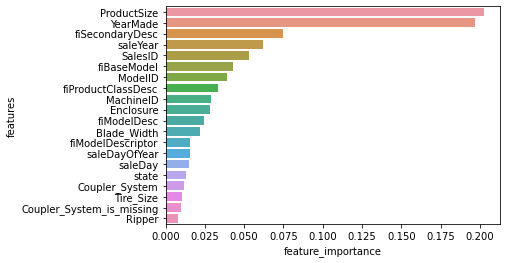

In [207]:
# Show the most important features for this model
    
plot_features(X_train_temp.columns, temp.feature_importances_)

### 6.3.1c Model with Most Used Features and Less NaNs

In [208]:
# Create temp train, valid, test datasets with the feature adjustment
#create a temporary dataframe copying the training dataset.
temp_train_df = temp_df.copy()
temp_valid_df = valid_df.copy()
temp_test_df = test_df.copy()

#Drop the least used features
temp_train_df = drop_mass_missing_features(temp_train_df)
temp_valid_df = drop_mass_missing_features(temp_valid_df)
temp_test_df = drop_mass_missing_features(temp_test_df)

In [209]:
# Model

#Split data with the most used features
X_train_temp = temp_train_df.drop(['SalePrice','SalePrice_is_missing','numMissing'], axis=1)
y_train_temp = temp_train_df.SalePrice

X_valid_temp = temp_valid_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_valid_temp = temp_valid_df.SalePrice

X_test_temp = temp_test_df.drop(['SalePrice','SalePrice_is_missing'], axis=1)
y_test_temp = temp_test_df.SalePrice

# max_samples = 5000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
temp= RandomForestRegressor(n_jobs= -1, 
                                  max_samples=5000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
temp.fit(X_train_temp,y_train_temp)

# score model
train_preds = temp.predict(X_train_temp)
valid_preds = temp.predict(X_valid_temp)
test_preds = temp.predict(X_test_temp)
temp_metrics ={'Train Root Mean Squared Log Error': rmsle(y_train_temp,train_preds),
                'Valid Root Mean Squared Log Error': rmsle(y_valid_temp, valid_preds),
                'Test Root Mean Squared Log Error': rmsle(y_test_temp,test_preds)}

#show model metrics
temp_metrics

{'Train Root Mean Squared Log Error': 0.29276791244236056,
 'Valid Root Mean Squared Log Error': 0.4644841657559852,
 'Test Root Mean Squared Log Error': 0.22944865147653162}

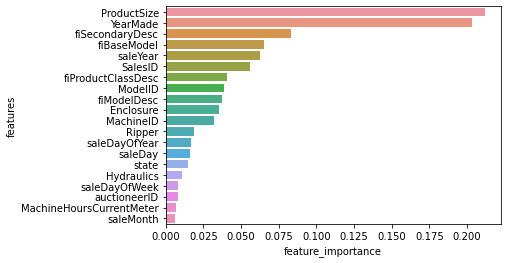

In [210]:
# Show the most important features for this model
    
plot_features(X_train_temp.columns, temp.feature_importances_)

##### Notes:
The results were mixed between the modeling of above. No adjustments made the RMSLE better for both the valid and test dataset.
The data will stay the same as the original. If this were a team effort by a company it would be suggested to standardize the data collection. And/or ask what the future data would look more similar to, the valid or test set.

Model with Original Data Editting
- 'Train Root Mean Squared Log Error': 0.29008791970388553,
- 'Valid Root Mean Squared Log Error': 0.41659382271207096,
- 'Test Root Mean Squared Log Error': 0.2990268476858745


Model with Least Used Features Dropped
- 'Train Root Mean Squared Log Error': 0.29276791244236056, <-worse than original by 0.0027
- 'Valid Root Mean Squared Log Error': 0.4644841657559852, <-worse than original by 0.052
- 'Test Root Mean Squared Log Error': 0.22944865147653162 <-better than original by 0.07
 
Model with Data Removed with More than 30 Data Points Missing in Sample
- 'Train Root Mean Squared Log Error': 0.2908406712109935, <-worse than original by 0.0008
- 'Valid Root Mean Squared Log Error': 0.41918036028028627, <-worse than original by 0.003
- 'Test Root Mean Squared Log Error': 0.29180827413998073 <-better than original by 0.0072
 
Model with Both Attributes Listed Above
- 'Train Root Mean Squared Log Error': 0.2926601658306132, <-worse than original by 0.0026
- 'Valid Root Mean Squared Log Error': 0.4738072123175361, <-worse than original by 0.057
- 'Test Root Mean Squared Log Error': 0.22417120763784465 <-better than original by 0.075

### 6.3.2 Tune with RandomizedSearchCV
Find better hyperparameter settings with the RandomizedSearchCV function.

##### Show the default model for the number of samples = 5000

In [75]:
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg = RandomForestRegressor(n_jobs= -1, max_samples=5000)

# fit model
reg.fit(X_train,y_train)

# score model
reg_metrics = model_metrics(reg)

#show model metrics
reg_metrics

{'Train Mean Absoluate Error': 6228.496952521035,
 'Train R^2': 0.8289544834586071,
 'Train Root Mean Squared Log Error': 0.29032614728118855,
 'Valid Mean Absoluate Error': 10492.900625594055,
 'Valid R^2': 0.6011386438594888,
 'Valid Root Mean Squared Log Error': 0.40737205136901805,
 'Test Mean Absoluate Error': 4655.039060066141,
 'Test R^2': 0.8556167095712728,
 'Test Root Mean Squared Log Error': 0.2757165234548621}

##### RandomizedSearchCV Modeling

In [73]:
#Set random seed for modeling consistency
np.random.seed(0)

# create grid for RandomizedSearchCV
# The values here are guessed based on the documentation
rs_grid = {"n_estimators": np.arange(10, 150, 10),
           "max_depth": [None, 3, 5, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 10, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [5000]}

# Create Model
# n_jobs =-1 means that all processors are used for modeling.
# cv is the amount of cross validations created
# n_iter is the parameter settings that are sampled. 
# verbose is the increse of messages created
reg2 = RandomizedSearchCV(RandomForestRegressor(),
                         param_distributions = rs_grid,
                         cv = 5,
                         n_iter = 20,
                         verbose = True,
                         n_jobs = -1)


# fit model
reg2.fit(X_train,y_train)

# score model
reg2_metrics = model_metrics(reg2)

#show model metrics
reg2_metrics

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'Train Mean Absoluate Error': 6478.28679152161,
 'Train R^2': 0.8129004427541968,
 'Train Root Mean Squared Log Error': 0.29879094063532197,
 'Valid Mean Absoluate Error': 10662.102653549719,
 'Valid R^2': 0.579684440361456,
 'Valid Root Mean Squared Log Error': 0.42103549145024616,
 'Test Mean Absoluate Error': 5074.7656885288025,
 'Test R^2': 0.825324594695297,
 'Test Root Mean Squared Log Error': 0.3104173244130806}

In [74]:
# See the best hyperparameters from the RandomizedSearchCV
reg2.best_params_

{'n_estimators': 110,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_samples': 5000,
 'max_features': 'auto',
 'max_depth': None}

##### Note:
 The RandomizedSearch CV actually choice worse hyperparameters than the default's. This may have been caused by the cross-validation of the multiple sections of data.

### 6.3.3 Tune with GridSearchCV
Find better hyperparameter settings with the GridSearchCV function.

In [78]:
#Set random seed for modeling consistency
np.random.seed(0)

# create grid for RandomizedSearchCV
# The values here are guessed based on the RandomizedSearchCV and the defaults
gs_grid = {"n_estimators": [95,115],
           "max_depth": [None, 3],
           "min_samples_split": [2,12],
           "min_samples_leaf": [1,5],
           "max_features": ["auto"],
           "max_samples": [5000]}

# Create Model
reg3 = GridSearchCV(RandomForestRegressor(),
                         param_grid = gs_grid,
                         cv = 5,
                         verbose = True,
                         n_jobs = -1)




# fit model
reg3.fit(X_train,y_train)

# score model
reg3_metrics = model_metrics(reg3)

#show model metrics
reg3_metrics

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'Train Mean Absoluate Error': 6229.5136447163395,
 'Train R^2': 0.8288868012370039,
 'Train Root Mean Squared Log Error': 0.2903238463729554,
 'Valid Mean Absoluate Error': 10515.792316053246,
 'Valid R^2': 0.6005092803422842,
 'Valid Root Mean Squared Log Error': 0.40820345265024166,
 'Test Mean Absoluate Error': 4639.496825249214,
 'Test R^2': 0.8563734364222733,
 'Test Root Mean Squared Log Error': 0.2745529431278991}

##### Note: This one is a little better than the default!

In [79]:
reg3.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 5000,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 95}

#### Try Grid Search Again but with a Range
The max_depth, min_sample_split, and min_sample_leaf will be consistent per the last gridsearchcv results

In [82]:
#Set random seed for modeling consistency
np.random.seed(0)

# create grid for RandomizedSearchCV
# The values here are guessed based on the RandomizedSearchCV and the defaults
gs2_grid = {"n_estimators": np.arange(95,115,1),
           "max_depth": [None],
           "min_samples_split": [2],
           "min_samples_leaf": [1],
           "max_features": ["auto"],
           "max_samples": [5000]}

# Create Model
reg3 = GridSearchCV(RandomForestRegressor(),
                         param_grid = gs2_grid,
                         cv = 5,
                         verbose = True,
                         n_jobs = -1)

# fit model
reg3.fit(X_train,y_train)

# score model
reg3_metrics = model_metrics(reg3)

#show model metrics
reg3_metrics

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'Train Mean Absoluate Error': 6223.458590856075,
 'Train R^2': 0.8291699642536455,
 'Train Root Mean Squared Log Error': 0.2900299661556152,
 'Valid Mean Absoluate Error': 10484.64632786494,
 'Valid R^2': 0.6010411386529417,
 'Valid Root Mean Squared Log Error': 0.4076190910318036,
 'Test Mean Absoluate Error': 4656.743011453634,
 'Test R^2': 0.8550124499535761,
 'Test Root Mean Squared Log Error': 0.27771074582902877}

In [83]:
reg3.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 5000,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 105}

### 6.3.4 Find Ideal Sample Size

The best outcome is best for the valid and test datasets with the default hyperparameters. They are as follows:

> 'max_depth': None,
 'max_features': 'auto',
 'max_samples': 5000,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100

In [95]:
# max_samples = 50000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg4 = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=50000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
reg4.fit(X_train,y_train)

# score model
reg4_metrics = model_metrics(reg4)

#show model metrics
reg4_metrics

{'Train Mean Absoluate Error': 4366.318969174199,
 'Train R^2': 0.9109988473374174,
 'Train Root Mean Squared Log Error': 0.21178936829011238,
 'Valid Mean Absoluate Error': 11144.59927071632,
 'Valid R^2': 0.4964936523707508,
 'Valid Root Mean Squared Log Error': 0.48167667596539815,
 'Test Mean Absoluate Error': 6149.1534195740405,
 'Test R^2': 0.7374908039984378,
 'Test Root Mean Squared Log Error': 0.38129946566366085}

In [96]:
# max_samples = 100000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg4 = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=100000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
reg4.fit(X_train,y_train)

# score model
reg4_metrics = model_metrics(reg4)

#show model metrics
reg4_metrics

{'Train Mean Absoluate Error': 3640.398455119974,
 'Train R^2': 0.9371199667541121,
 'Train Root Mean Squared Log Error': 0.1800900080559624,
 'Valid Mean Absoluate Error': 11256.686524669489,
 'Valid R^2': 0.4877661841391947,
 'Valid Root Mean Squared Log Error': 0.485329700626698,
 'Test Mean Absoluate Error': 6262.679391003589,
 'Test R^2': 0.7221706682385063,
 'Test Root Mean Squared Log Error': 0.3820290969761456}

In [97]:
# max_samples = 200000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg4 = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=200000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
reg4.fit(X_train,y_train)

# score model
reg4_metrics = model_metrics(reg4)

#show model metrics
reg4_metrics

{'Train Mean Absoluate Error': 2712.2703501402307,
 'Train R^2': 0.9644592739624462,
 'Train Root Mean Squared Log Error': 0.1384788501055805,
 'Valid Mean Absoluate Error': 11523.316228289987,
 'Valid R^2': 0.45404462777072796,
 'Valid Root Mean Squared Log Error': 0.5056671323221364,
 'Test Mean Absoluate Error': 6620.611227053375,
 'Test R^2': 0.6757537988073654,
 'Test Root Mean Squared Log Error': 0.4002985398975058}

In [98]:
# max_samples = 25000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg4 = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=25000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
reg4.fit(X_train,y_train)

# score model
reg4_metrics = model_metrics(reg4)

#show model metrics
reg4_metrics

{'Train Mean Absoluate Error': 4951.905986263635,
 'Train R^2': 0.8870178885945297,
 'Train Root Mean Squared Log Error': 0.23678300835423857,
 'Valid Mean Absoluate Error': 10954.645486909185,
 'Valid R^2': 0.5152834652106599,
 'Valid Root Mean Squared Log Error': 0.4577370686574206,
 'Test Mean Absoluate Error': 5770.947992590222,
 'Test R^2': 0.7747315467837649,
 'Test Root Mean Squared Log Error': 0.3526019287034881}

In [99]:
# max_samples = 10000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg4 = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=10000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
reg4.fit(X_train,y_train)

# score model
reg4_metrics = model_metrics(reg4)

#show model metrics
reg4_metrics

{'Train Mean Absoluate Error': 5664.888680411343,
 'Train R^2': 0.8558898815220282,
 'Train Root Mean Squared Log Error': 0.2668939181712923,
 'Valid Mean Absoluate Error': 10827.740133932428,
 'Valid R^2': 0.5445269207034418,
 'Valid Root Mean Squared Log Error': 0.43423333154011273,
 'Test Mean Absoluate Error': 5390.461025079468,
 'Test R^2': 0.8051250311403637,
 'Test Root Mean Squared Log Error': 0.324527735790209}

In [100]:
# max_samples = 5000
#Set random seed for modeling consistency
np.random.seed(0)

# create model
reg4 = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=5000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 100)

# fit model
reg4.fit(X_train,y_train)

# score model
reg4_metrics = model_metrics(reg4)

#show model metrics
reg4_metrics

{'Train Mean Absoluate Error': 6228.496952521035,
 'Train R^2': 0.8289544834586071,
 'Train Root Mean Squared Log Error': 0.29032614728118855,
 'Valid Mean Absoluate Error': 10492.900625594055,
 'Valid R^2': 0.6011386438594888,
 'Valid Root Mean Squared Log Error': 0.40737205136901805,
 'Test Mean Absoluate Error': 4655.039060066141,
 'Test R^2': 0.8556167095712728,
 'Test Root Mean Squared Log Error': 0.2757165234548621}

### 6.3.4 Show Evaluation Metrics of Ideal Model

Ideal Model created was of RandomForestRegressor with hyperparamters:
- 'max_depth': None,
- 'max_features': 'auto',
- 'max_samples': 5000,
- 'min_samples_leaf': 1,
- 'min_samples_split': 2,
- 'n_estimators': 105

In [89]:
#### Create Ideal Model
#Set random seed for modeling consistency
np.random.seed(0)

# create model
ideal_reg_model = RandomForestRegressor(n_jobs= -1, 
                                  max_samples=50000,
                                  max_depth= None,
                                  max_features = 'auto',
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 105)

# fit model
ideal_reg_model.fit(X_train,y_train)

# score model
ideal_reg_model_metrics = model_metrics(ideal_reg_model)

#show model metrics
ideal_reg_model_metrics

{'Train Mean Absoluate Error': 4365.199916781669,
 'Train R^2': 0.9110547207482832,
 'Train Root Mean Squared Log Error': 0.2117297032593033,
 'Valid Mean Absoluate Error': 11136.065135187404,
 'Valid R^2': 0.49851289149279565,
 'Valid Root Mean Squared Log Error': 0.4805868077107621,
 'Test Mean Absoluate Error': 6139.309184616874,
 'Test R^2': 0.7390160653299502,
 'Test Root Mean Squared Log Error': 0.38123376560008193}

##### Show the Most important Features of the Ideal Model

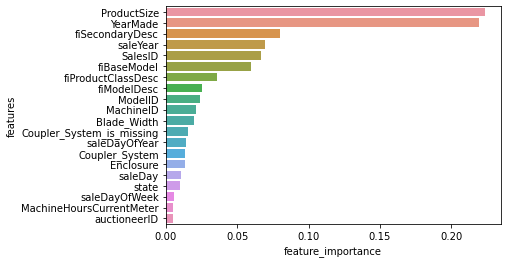

In [211]:
#Plot the important features of the ideal model
plot_features(X_train.columns, ideal_reg_model.feature_importances_)

# Conclusion

This RandomForestRegression model's test dataset's root mean squared log error was 0.3812. Which would have been between 90 and 91st place in the competition. For this model to do the best seen in this notebook for the test dataset, the adjusted data could be used from section **6.3.1c** which had a RMSLE of ~0.229. This value would have placed between 1st and 2nd within the competition. This wasn't used in the final model because it predicted worse by the valid dataset. That data was the only one available for the competition. 

For a future use, it would be suggested to the company to homogenize the new data to predict better. If it was known if future data would represent the valid or test datasets (as in features filled in), the model would be adjusted to show the best for that. Also, features can be dropped for future data since they have little importance for the model.